<a href="https://colab.research.google.com/github/AashiDutt/Deep-Learning-with-Python-edition-2/blob/main/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BOOK - DEEP LEARNING WITH PYTHON (EDITION 2)

Code- Chapter 3 (Intro to Keras and TensorFlow)

Tensors need to be created with some iunitial value and following are some common ways of creating tensors.

In [2]:
# All zeros and Ones tensors
import tensorflow as tf
x = tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
y = tf.zeros(shape = (2,1))
print(y)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Equivalent to 

np.ones(shape = (2,1))  and   
np.zeros(shape = (2,1))

In [6]:
# Randon Tensors

x = tf.random.normal(shape =(3,1), mean = 0., stddev = 1.)
print(x)

tf.Tensor(
[[-1.1425971]
 [ 1.0585824]
 [ 1.7593197]], shape=(3, 1), dtype=float32)


In [8]:
y = tf.random.uniform(shape= (3,1), minval = 0., maxval = 1.)
print(y)

tf.Tensor(
[[0.9831734 ]
 [0.5621805 ]
 [0.67008376]], shape=(3, 1), dtype=float32)


Similar as:

np.random.normal(shape = (3,1), low = 0., high = 1.)

In [9]:
# Assignment - NumPy arrays are assignable while Tensors are not

import numpy as np
x = np.ones(shape= (2,1))
x[0,0] = 0.

In [11]:
x = tf.ones(shape = (2,1))
# x[0,0] = 0.  - gives an error


In [12]:
# Creating a variable

V = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))
print(V)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.4092076 ],
       [-0.09742592],
       [ 0.9922188 ]], dtype=float32)>


In [13]:
# Assigning value to variable

V.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
# Assigning value to a subset of a variable

V[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [17]:
# assign_add

V.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

In [19]:
# Basic math operations

a = tf.ones(shape = (2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c # add two tensors element wise
e = tf.matmul(a,b) # product of two tensors
e *= d # multiply two tensors element wise

In [20]:
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


**Retrieving Gradient from any differential expression with respect to any of its input using GradientTape.**

**Cannot be done using NumPy**

In [21]:
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Most Common use of GradientTape**

Retrieve loss of a model with respect to its weights.

gradient = tape.gradient(loss, weights)

In [22]:
# Input to GradientTape can be any arbitrary Tensor along with Tf variable
# use tape.watch() to track it manually to avaoid wasting of resources
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)


In [25]:
# Finding Second Order Gradient

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)   # first order gradient
acceleration = outer_tape.gradient(speed, time)  # second order gradient
print('Acceleration = ', acceleration)

Acceleration =  tf.Tensor(9.8, shape=(), dtype=float32)


# Implementing Linear Classifier from scratch in TF

In [26]:
# Linearly seprable synthetic data with two classes of points in 2D plane.

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[3,0], cov = [[1,0.5], [0.5, 1]], size = num_samples_per_class)

1000 random 2D points generated with specified mean and covariance matrix.

**covariance matrix** - describes shape of point cloud.

**mean** - describes its position in the plane

**cov = [[1,0.5],[0.5,1]]** - describes oval-like point cloud oriented from bottom left to top right.

**negative_samples and positive samples are arrays of shape(1000, 2)**


Stacking them to single array with shape - **(2000, 2)**


In [27]:
# stacking 2 arrays

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [28]:
# Generating target labels
# create a target array of zeros and ones of shape (2000, 1), where targets[i, 0] is 0 if inputs[i] belongs to class 0 and vice a versa

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

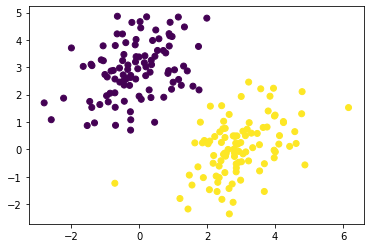

In [29]:
# Plotting two point classes

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

# Building a linear classifier to separate two blobs.

**PREDICTION = Weights * input + bias**

Trained to minimize the square of the difference between predictions and the targets.

In [30]:
# Variables

input_dim = 2
output_dim = 1
w = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

In [31]:
# Forward pass

def model(inputs):
  return tf.matmul(inputs, w) + b

In [32]:
# mean squared loss

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses) # reduce_mean avergaes all losses to a single number

Training step - recieves some training data and updates the weights and bias, so as to minimize the loss on the data

In [33]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss


In [35]:
# Batch training

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.3315
Loss at step 1: 0.4163
Loss at step 2: 0.1639
Loss at step 3: 0.1371
Loss at step 4: 0.1270
Loss at step 5: 0.1187
Loss at step 6: 0.1112
Loss at step 7: 0.1043
Loss at step 8: 0.0980
Loss at step 9: 0.0922
Loss at step 10: 0.0869
Loss at step 11: 0.0820
Loss at step 12: 0.0776
Loss at step 13: 0.0735
Loss at step 14: 0.0697
Loss at step 15: 0.0663
Loss at step 16: 0.0632
Loss at step 17: 0.0603
Loss at step 18: 0.0577
Loss at step 19: 0.0552
Loss at step 20: 0.0530
Loss at step 21: 0.0510
Loss at step 22: 0.0491
Loss at step 23: 0.0474
Loss at step 24: 0.0459
Loss at step 25: 0.0444
Loss at step 26: 0.0431
Loss at step 27: 0.0419
Loss at step 28: 0.0408
Loss at step 29: 0.0398
Loss at step 30: 0.0389
Loss at step 31: 0.0380
Loss at step 32: 0.0373
Loss at step 33: 0.0365
Loss at step 34: 0.0359
Loss at step 35: 0.0353
Loss at step 36: 0.0347
Loss at step 37: 0.0342
Loss at step 38: 0.0338
Loss at step 39: 0.0334


Because our targets are zeros and ones, a given input point will be classified as 0 if prediction value is less than 0.5 and 1 if prediction is greater than 0.5.

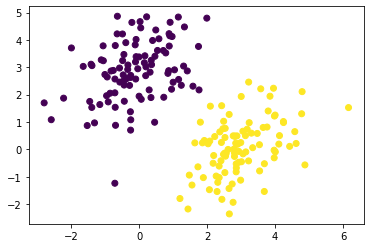

In [36]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c= predictions[:, 0] > 0.5) # c colors points greater than 0.5 to distingiush
plt.show()

Equation of line becomes 

 y = -w1 / w2 * x + (0.5 - b)  /w2

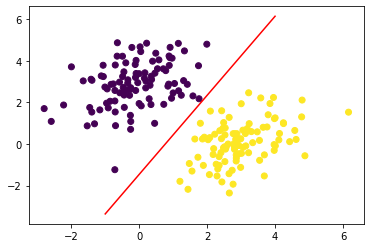

In [37]:
# plotting the line

x = np.linspace(-1, 4, 100) # generate 100 evenly spaces numbers b/w -1 and 4 used to plot the line
y = -w[0] /w[1]  * x + (0.5 - b) /w[1]
plt.plot(x, y, "-r") # r - red line
plt.scatter(inputs[:, 0], inputs[: , 1], c = predictions[:, 0 ] > 0.5) # c colors points greater than 0.5 to distingiush

#Working with Keras

##Base Layer in Keras:

**A layer is an object that encapsulates some state(weights) and some computation(forward pass).**

- Weights are typically defined in build() [ could also be created in constructor init()].

- Computation is defined in call() method.

In [41]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # all layers inherit from the base layer
  def __init__(self, units, activation = None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.w = self.add_weight(shape = (input_dim, self.units),
                             initializer="random_normal")
    
    self.b = self.add_weight(shape= (self.units,),
                             initializer = "zeros") # shortcut for creating weights
  
  def call(self, inputs): # used for forward pass
    y = tf.matmul(inputs, self.w) +self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [42]:
# Instantiate layer and create some test inputs, then call the layer on the inputs.
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [43]:
# Every layer will accept only input of specific shape and output tensors of cetain shape.
# A dense layer with 32 output units

from tensorflow.keras import layers
layer = layers.Dense(32, activation = "relu")

In [45]:
#Models are dynamically built to match shape of their input to the shape of incoming input.

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
                          layers.Dense(32, activation="relu"),
                          layers.Dense(32)
])

In [46]:
# With automatic shape inference with Keras, the functions will become

def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

Once model architecture is defined - we look into loss function, optimizer and metrics

In [47]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics = ["accuracy"])

In [48]:
history = model.fit(inputs, targets, epochs = 5, batch_size = 128)

Epoch 1/5
2/2 [==============================] - 0s 7ms/step - loss: 6.3313 - accuracy: 0.9550
Epoch 2/5
2/2 [==============================] - 0s 5ms/step - loss: 6.2556 - accuracy: 0.9550
Epoch 3/5
2/2 [==============================] - 0s 9ms/step - loss: 6.2011 - accuracy: 0.9550
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 6.1549 - accuracy: 0.9550
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 6.1146 - accuracy: 0.9550


In [49]:
history.history

{'accuracy': [0.9549999833106995,
  0.9549999833106995,
  0.9549999833106995,
  0.9549999833106995,
  0.9549999833106995],
 'loss': [6.331326484680176,
  6.255557060241699,
  6.201109409332275,
  6.154901504516602,
  6.114569664001465]}

In [50]:
# separating validation data
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs)) # reserve 30% inputs and targets for validation
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs =5,
    batch_size = 16,
    validation_data = (val_inputs, val_targets)
)


Epoch 1/5
9/9 [==============================] - 0s 24ms/step - loss: 6.3548 - accuracy: 0.9571 - val_loss: 5.1548 - val_accuracy: 0.9500
Epoch 2/5
9/9 [==============================] - 0s 5ms/step - loss: 6.2137 - accuracy: 0.9571 - val_loss: 5.0462 - val_accuracy: 0.9500
Epoch 3/5
9/9 [==============================] - 0s 7ms/step - loss: 6.0865 - accuracy: 0.9571 - val_loss: 4.9344 - val_accuracy: 0.9500
Epoch 4/5
9/9 [==============================] - 0s 5ms/step - loss: 5.9607 - accuracy: 0.9571 - val_loss: 4.8301 - val_accuracy: 0.9500
Epoch 5/5
9/9 [==============================] - 0s 4ms/step - loss: 5.8366 - accuracy: 0.9571 - val_loss: 4.7218 - val_accuracy: 0.9500
